In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [8]:
import os
this_directory = os.path.realpath(".")
home_directory = os.path.split(this_directory)[0]
data_directory = os.path.join(home_directory, "data")
images_directory = os.path.join(home_directory, "images")

PCA, SVD, NMF, ?LDA

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [163]:
!ls ../data

acs5-15.csv          qozs.csv             states.pkl
qoz_model.pkl        qozs_1.pkl
qoz_model_plusPR.pkl qozs_features.pkl


In [164]:
def add_LIC_col(dataframe):
    LIC_column = pd.read_pickle("{}/qozs_1.pkl".format(data_directory))[['census_tract_number', 'Non-LIC']]
    LIC_column = LIC_column.rename(columns={'census_tract_number':'tract'})
    return dataframe.merge(LIC_column, how='left', on='tract')

In [166]:
features = pd.read_pickle(f"{data_directory}/qoz_model.pkl")
features

,population_total,age_median,p_never_married,p_white,p_black,poverty,household_income_median,home_value_median,structure_year_median,outofcountyflux,p_renting,vacancy,p_mobilehomes,p_multiple_unit_strucs,tract,state,Non-LIC
0,2761.0,36.3,0.252,0.775,0.204,0.289,34821.0,94100.0,1980.0,0.109,0.350,0.117,0.468,0.515,01001020700,01,0
1,2869.0,40.1,0.199,0.865,0.104,0.288,31390.0,127600.0,1988.0,0.031,0.201,0.134,0.245,0.332,01003010200,01,0
2,4537.0,43.0,0.235,0.915,0.044,0.149,44985.0,130300.0,1991.0,0.054,0.154,0.173,0.247,0.247,01003010400,01,1
3,5321.0,41.5,0.255,0.842,0.129,0.179,41944.0,131100.0,1975.0,0.071,0.321,0.147,0.010,0.172,01003010500,01,0
4,3398.0,29.3,0.431,0.375,0.625,0.220,27587.0,92300.0,1978.0,0.019,0.434,0.185,0.199,0.410,01003010600,01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,2254.0,50.2,0.210,0.951,0.000,0.201,51023.0,150000.0,1973.0,0.104,0.259,0.286,0.250,0.286,56031959100,56,0
8681,6496.0,47.1,0.163,0.940,0.000,0.145,35531.0,157100.0,1973.0,0.132,0.210,0.164,0.140,0.193,56031959400,56,0
8682,3165.0,27.5,0.331,0.912,0.012,0.198,63288.0,176800.0,1982.0,0.196,0.525,0.203,0.245,0.662,56037970903,56,0
8683,7081.0,35.2,0.190,0.918,0.000,0.239,38771.0,155600.0,1975.0,0.101,0.337,0.127,0.234,0.421,56041975400,56,0


In [167]:
tract_numbers = features['tract']
X = features.drop(columns=['tract', 'state'])
X

,population_total,age_median,p_never_married,p_white,p_black,poverty,household_income_median,home_value_median,structure_year_median,outofcountyflux,p_renting,vacancy,p_mobilehomes,p_multiple_unit_strucs,Non-LIC
0,2761.0,36.3,0.252,0.775,0.204,0.289,34821.0,94100.0,1980.0,0.109,0.350,0.117,0.468,0.515,0
1,2869.0,40.1,0.199,0.865,0.104,0.288,31390.0,127600.0,1988.0,0.031,0.201,0.134,0.245,0.332,0
2,4537.0,43.0,0.235,0.915,0.044,0.149,44985.0,130300.0,1991.0,0.054,0.154,0.173,0.247,0.247,1
3,5321.0,41.5,0.255,0.842,0.129,0.179,41944.0,131100.0,1975.0,0.071,0.321,0.147,0.010,0.172,0
4,3398.0,29.3,0.431,0.375,0.625,0.220,27587.0,92300.0,1978.0,0.019,0.434,0.185,0.199,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,2254.0,50.2,0.210,0.951,0.000,0.201,51023.0,150000.0,1973.0,0.104,0.259,0.286,0.250,0.286,0
8681,6496.0,47.1,0.163,0.940,0.000,0.145,35531.0,157100.0,1973.0,0.132,0.210,0.164,0.140,0.193,0
8682,3165.0,27.5,0.331,0.912,0.012,0.198,63288.0,176800.0,1982.0,0.196,0.525,0.203,0.245,0.662,0
8683,7081.0,35.2,0.190,0.918,0.000,0.239,38771.0,155600.0,1975.0,0.101,0.337,0.127,0.234,0.421,0


## PCA 

In [33]:
std_scaler = StandardScaler()
std_X = std_scaler.fit_transform(X.values)

[2.7610e+03 3.6300e+01 2.5200e-01 7.7500e-01 2.0400e-01 2.8900e-01
 3.4821e+04 9.4100e+04 1.9800e+03 8.9100e-01 3.5000e-01 1.1700e-01
 4.6800e-01 5.1500e-01 0.0000e+00] [-0.6453838   0.14632473 -1.1249722   0.6598413  -0.22436018 -0.04591909
  0.10121414 -0.42187241  0.87747338 -0.39066623 -0.86649385 -0.38169049
  3.24166067  0.22605927 -0.14860297]


In [66]:
n = 9
paxPCA = PCA(n_components=n)
p10 = paxPCA.fit(std_X)

In [67]:
p10.explained_variance_ratio_

array([0.2880903 , 0.1498355 , 0.10180939, 0.08507877, 0.07359123,
       0.06889756, 0.05712519, 0.0391976 , 0.0360085 ])

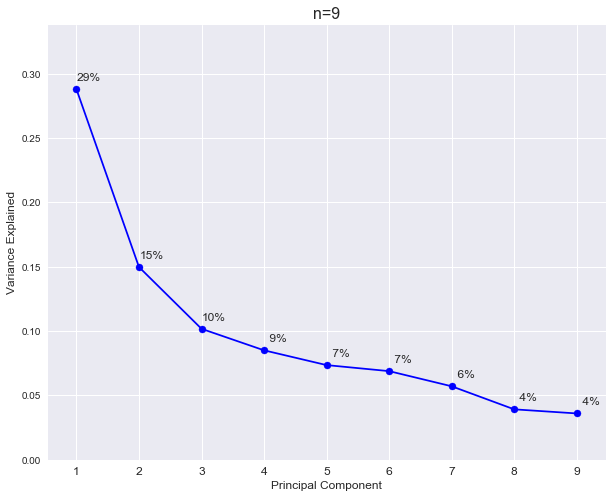

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
scree_plot(ax, p10, n_components_to_plot=n, title="n={}".format(n))

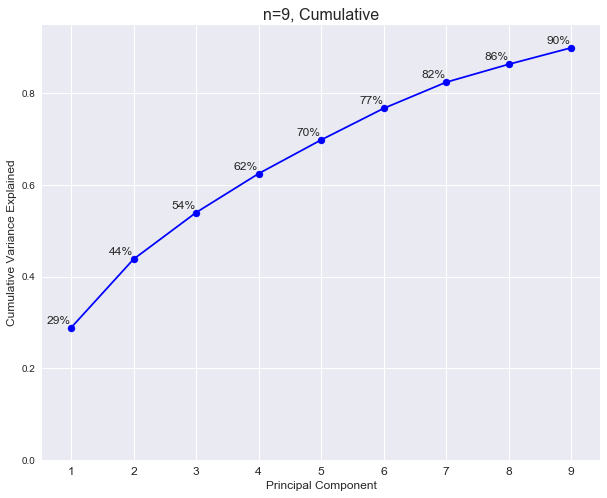

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
scree_plot(ax, p10, n_components_to_plot=n, title="n={}, Cumulative".format(n), cumsum=True)

In [56]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None, cumsum=False):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the scree plot.
      
    title: str
      A title for the scree plot.
    """
    if cumsum:
        vals = np.cumsum(pca.explained_variance_ratio_)
        y_label, y_pos = "Cumulative ", -1
    else:
        vals = pca.explained_variance_ratio_
        y_label, y_pos = "", 1
        
    num_components = pca.n_components_
    ind = np.arange(num_components)
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.0f}%".format(vals[i]*100), 
               (ind[i]+(y_pos*0.2), vals[i]+0.005), 
               va="bottom", 
               ha="center", 
               fontsize=12)

    ax.set_xticks(ind)
    ax.set_xticklabels(ind + 1, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("{}Variance Explained".format(y_label), fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

### This doesn't mean much 

In [144]:
component_a = np.dot(X, p10.components_[0])
component_b = np.dot(X, p10.components_[1])

(0, 600000)

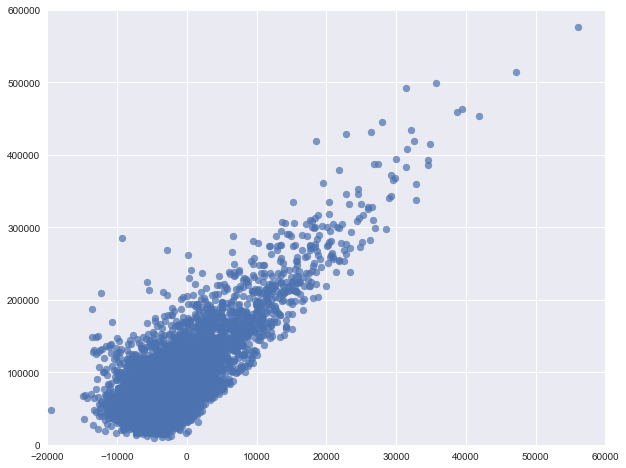

In [151]:
## plotting the first two components
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(component_a, component_b, alpha=0.7)
ax.set_xlim(-20000, 60000)
ax.set_ylim(0, 600000)

## SVD

In [72]:
u, s, v = np.linalg.svd(X.values)
print(np.shape(u), np.shape(s), np.shape(v))
# X = (observations, features)
# u = (observations, weight on topics)
# s = singular weight of each topic
# v = (topics, features)

(7822, 7822) (15,) (15, 15)


In [132]:
s_weights = s
for i, v in enumerate(s):
    print("{:>11.2f} ({})".format(v, i))

16505178.77 (0)
 1849048.21 (1)
  183511.61 (2)
   51093.21 (3)
     621.21 (4)
      33.70 (5)
      21.61 (6)
      12.51 (7)
      12.02 (8)
       9.67 (9)
       7.96 (10)
       7.40 (11)
       6.53 (12)
       6.25 (13)
       4.74 (14)


Text(0.5, 0, 'Singular value')

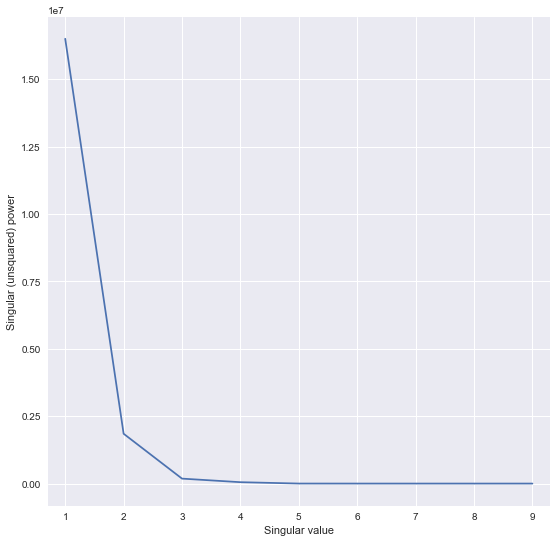

In [89]:
fig, ax = plt.subplots(figsize=(9,9))

## choose this
n_SVs = 9
s_plot = s[:n_SVs]
x = np.arange(np.shape(s_plot)[0]) + 1

ax.plot(x, s_plot)
ax.set_xlim(x[0] - 0.3, x[-1] + 0.3)
ax.set_ylabel("Singular (unsquared) power")
ax.set_xlabel("Singular value")

In [108]:
features = X.columns.values
feature_ranks = []

for i, latent_topic in enumerate(v[:n_SVs]):
    abs_weights = np.abs(latent_topic)
    sort_i = np.argsort(abs_weights)[::-1]
    print("Topic {} : {}".format(i, features[sort_i]))
    feature_ranks.append(sort_i)

Topic 0 : ['home_value_median' 'household_income_median' 'population_total'
 'structure_year_median' 'age_median' 'p_outofcountyflux' 'p_pop_renting'
 'p_white' 'p_multiple_unit_strucs' 'p_never_married' 'p_poverty'
 'p_black' 'p_units_vacant' 'p_mobilehomes' 'Non-LIC']
Topic 1 : ['household_income_median' 'home_value_median' 'population_total'
 'structure_year_median' 'age_median' 'p_outofcountyflux' 'p_white'
 'p_pop_renting' 'p_never_married' 'p_multiple_unit_strucs' 'p_poverty'
 'p_black' 'p_units_vacant' 'p_mobilehomes' 'Non-LIC']
Topic 2 : ['population_total' 'structure_year_median' 'household_income_median'
 'age_median' 'home_value_median' 'p_outofcountyflux' 'p_pop_renting'
 'p_poverty' 'p_multiple_unit_strucs' 'p_never_married' 'p_white'
 'p_black' 'p_mobilehomes' 'Non-LIC' 'p_units_vacant']
Topic 3 : ['structure_year_median' 'population_total' 'household_income_median'
 'age_median' 'p_outofcountyflux' 'p_pop_renting' 'p_black'
 'home_value_median' 'p_multiple_unit_strucs' '

In [115]:
np.shape(feature_ranks)

(9, 15)

In [133]:
mean_feature_ranks = np.mean(feature_ranks, axis = 0)  
w_mean_ranks = np.average(feature_ranks, weights = s_weights[:n_SVs], axis = 0)

print("Ranking of feature over first 9 topics, unweighted")
sort_f, sort_w = np.argsort(mean_feature_ranks), np.argsort(w_mean_ranks)
for f, rank in zip(features[sort_f], mean_feature_ranks[sort_f]):
    print("{:1.2f} : {}".format(rank, f))
    
print("Weighted by SV of latent topic")
for f, rank in zip(features[sort_w], w_mean_ranks[sort_w]):
    print("{:1.2f} : {} avg. rank.".format(rank, f))

Ranking of feature over first 9 topics, unweighted
5.00 : p_pop_renting
5.11 : household_income_median
5.11 : p_outofcountyflux
5.33 : p_black
5.67 : p_never_married
5.67 : p_mobilehomes
6.56 : p_white
6.78 : p_units_vacant
7.11 : age_median
7.22 : population_total
7.44 : home_value_median
8.44 : p_multiple_unit_strucs
9.33 : structure_year_median
9.56 : Non-LIC
10.67 : p_poverty
Weighted by SV of latent topic
0.08 : p_never_married avg. rank.
1.08 : p_black avg. rank.
3.10 : p_outofcountyflux avg. rank.
3.73 : home_value_median avg. rank.
4.00 : p_units_vacant avg. rank.
4.97 : p_pop_renting avg. rank.
6.10 : age_median avg. rank.
6.83 : population_total avg. rank.
7.91 : p_white avg. rank.
9.00 : p_poverty avg. rank.
9.29 : household_income_median avg. rank.
11.01 : p_mobilehomes avg. rank.
11.91 : structure_year_median avg. rank.
12.03 : p_multiple_unit_strucs avg. rank.
13.96 : Non-LIC avg. rank.


## NMF

NMF only has positive weightings – the benefit is the interpretability of the clusters

In [217]:
def centroid_plot(ax, features, centroid):
    '''Plot weightings of each feature on the cluster. Set ax title outside.
    Params:
        ax: Matplotlib ax object to plot on
        features: array of strings (n,)
        centroid: array of weightings (n,)
    '''
    y = np.arange(len(centroid))
    ax.barh(y, centroid, tick_label=features)
    ax.set_xlim(np.min(centroid) - 0.5, np.max(centroid) + 0.5)

In [287]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

In [223]:
X

,population_total,age_median,p_never_married,p_white,p_black,poverty,household_income_median,home_value_median,structure_year_median,outofcountyflux,p_renting,vacancy,p_mobilehomes,p_multiple_unit_strucs,Non-LIC
0,2761.0,36.3,0.252,0.775,0.204,0.289,34821.0,94100.0,1980.0,0.109,0.350,0.117,0.468,0.515,0
1,2869.0,40.1,0.199,0.865,0.104,0.288,31390.0,127600.0,1988.0,0.031,0.201,0.134,0.245,0.332,0
2,4537.0,43.0,0.235,0.915,0.044,0.149,44985.0,130300.0,1991.0,0.054,0.154,0.173,0.247,0.247,1
3,5321.0,41.5,0.255,0.842,0.129,0.179,41944.0,131100.0,1975.0,0.071,0.321,0.147,0.010,0.172,0
4,3398.0,29.3,0.431,0.375,0.625,0.220,27587.0,92300.0,1978.0,0.019,0.434,0.185,0.199,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,2254.0,50.2,0.210,0.951,0.000,0.201,51023.0,150000.0,1973.0,0.104,0.259,0.286,0.250,0.286,0
8681,6496.0,47.1,0.163,0.940,0.000,0.145,35531.0,157100.0,1973.0,0.132,0.210,0.164,0.140,0.193,0
8682,3165.0,27.5,0.331,0.912,0.012,0.198,63288.0,176800.0,1982.0,0.196,0.525,0.203,0.245,0.662,0
8683,7081.0,35.2,0.190,0.918,0.000,0.239,38771.0,155600.0,1975.0,0.101,0.337,0.127,0.234,0.421,0


In [299]:
mm_scaler, unit_scaler = MinMaxScaler(feature_range=(0,10)), MaxAbsScaler()
std_X = unit_scaler.fit_transform(X.values)
paxNMF = NMF(n_components=2)

In [300]:
w = paxNMF.fit_transform(std_X)
print("Error: ", paxNMF.reconstruction_err_)

Error:  467.13224059101793


In [292]:
# w = observations, topics
# h = topics, features
w = paxNMF.fit_transform(std_X)
h = paxNMF.components_

In [272]:
component_a = np.dot(X, paxNMF.components_[0])
component_b = np.dot(X, paxNMF.components_[1])

Text(0, 0.5, 'Component B')

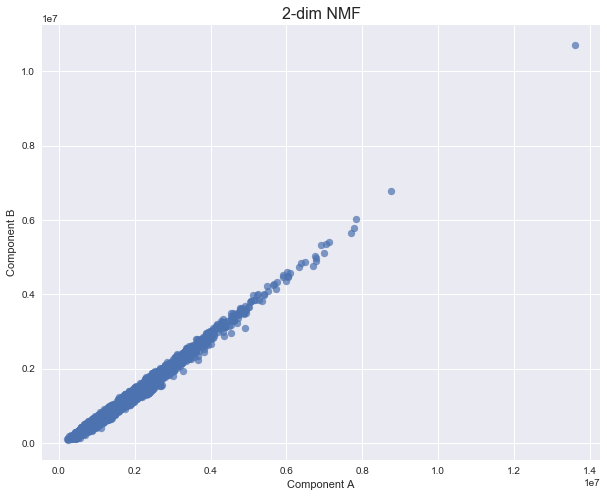

In [273]:
## plotting the first two components
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(component_a, component_b, alpha=0.7)
ax.set_title("2-dim NMF", fontsize=16)
ax.set_xlabel("Component A")
ax.set_ylabel("Component B")

In [284]:
# 3: (err=263) white, mobile homes, nonLIC, age, etc. | black, poverty, never married | home value, income, multiple units, pop.
# 4: (err=236) same-ish, plus outofcountyflux, structure year
# 5: (err=211)
n_comp=7
paxNMF2 = NMF(n_components=n_comp)
w = paxNMF2.fit_transform(pos_std_X)
h = paxNMF2.components_
np.shape(h)

(7, 15)

In [285]:
features = X.columns.values

feature_ranks = []
for i, latent_topic in enumerate(h):
    weights = latent_topic
    descriptive = inverse_std_positive(std_scaler, X, latent_topic)
    sort_i = np.argsort(weights)[::-1]
    print("Topic {} : {}".format(i, features[sort_i]))
    feature_ranks.append(sort_i)
    
    #print("Topic {} : {}".format(i, descriptive))

Topic 0 : ['p_mobilehomes' 'p_white' 'age_median' 'vacancy' 'p_multiple_unit_strucs'
 'structure_year_median' 'poverty' 'Non-LIC' 'outofcountyflux'
 'household_income_median' 'p_renting' 'home_value_median' 'p_black'
 'p_never_married' 'population_total']
Topic 1 : ['p_renting' 'p_never_married' 'p_multiple_unit_strucs' 'poverty'
 'p_black' 'Non-LIC' 'p_mobilehomes' 'vacancy' 'home_value_median'
 'outofcountyflux' 'structure_year_median' 'household_income_median'
 'p_white' 'age_median' 'population_total']
Topic 2 : ['home_value_median' 'household_income_median' 'p_multiple_unit_strucs'
 'p_renting' 'p_white' 'population_total' 'p_never_married'
 'outofcountyflux' 'age_median' 'structure_year_median' 'Non-LIC'
 'p_mobilehomes' 'vacancy' 'poverty' 'p_black']
Topic 3 : ['outofcountyflux' 'poverty' 'structure_year_median' 'p_white'
 'population_total' 'p_never_married' 'vacancy' 'p_renting'
 'home_value_median' 'Non-LIC' 'age_median' 'p_multiple_unit_strucs'
 'p_mobilehomes' 'household_in

Error:  168.0915773445224


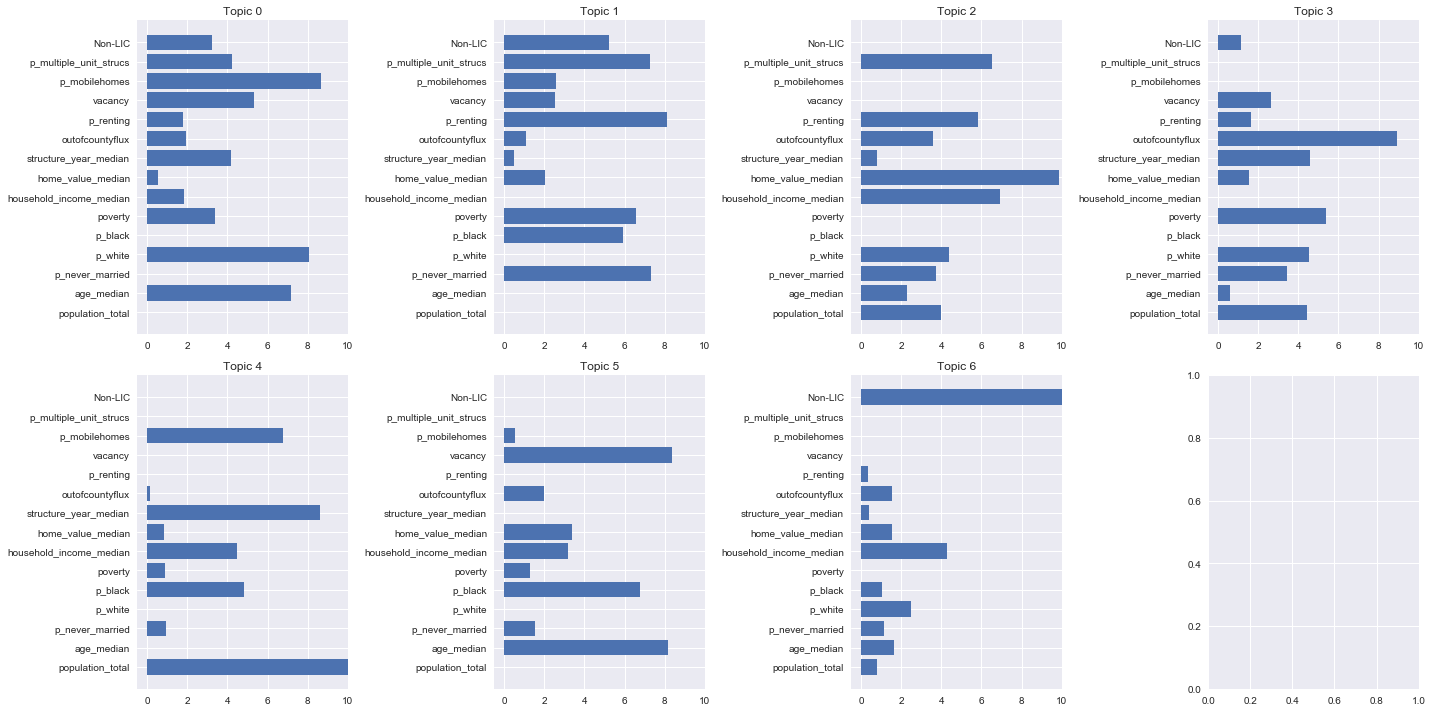

In [286]:
print("Error: ", paxNMF2.reconstruction_err_)
if n_comp > 4:
    figshape = (2, n_comp // 2 + 1 )
else:
    figshape = (1, n_comp)
    
fig, axes = plt.subplots(figshape[0], figshape[1], figsize=(20,10))

i = 0
for ax, c in zip(axes.flatten(), h):
    centroid_plot(ax, features, c)
    ax.set_title("Topic {}".format(i))
    ax.set_xlim(-0.5, 10)
    i+=1
    
fig.tight_layout()